In [62]:
import magpylib as magpy
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.transform import Rotation as R

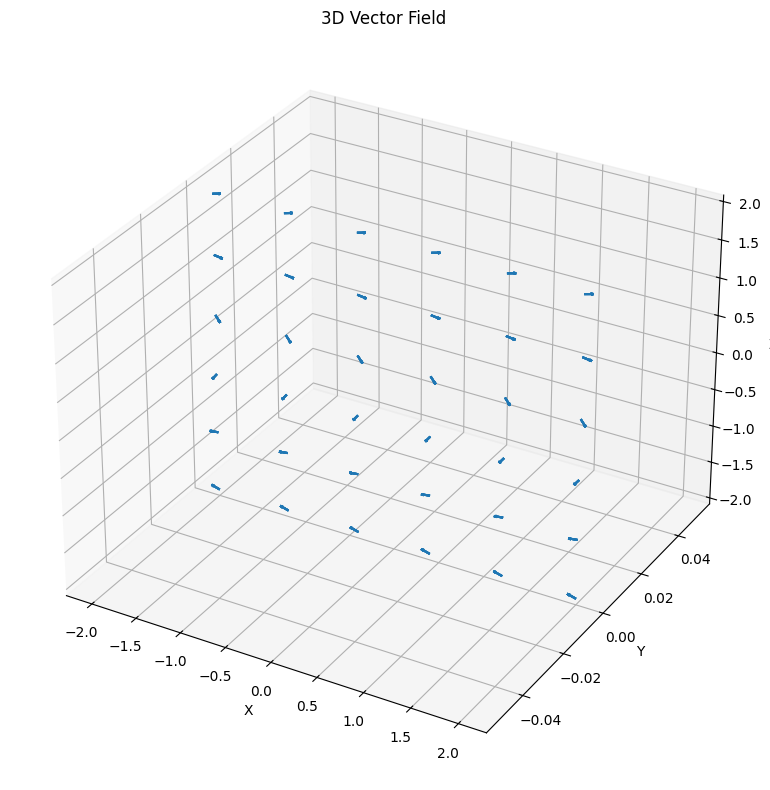

In [22]:
cube = magpy.magnet.Cuboid( dimension=[1,1,1], polarization=[0,0,1])
r_a = np.array([0, 0,0])
r_b = np.array([0, 1, 0])
n = np.array([0, 0, 1])
alpha = 0.01
Br = 1

# Create grid
x = np.linspace(-2, 2, 6)  # Smaller grid for better visualization
y = np.linspace(0,0,6)
z = np.linspace(-2,2 ,6)
X, Y, Z = np.meshgrid(x, y, z)

# Initialize arrays to hold the vector field components
Bx = np.zeros(x.shape)
By = np.zeros(y.shape)
Bz = np.zeros(z.shape)
b_ss = []
# Calculate B field at each grid point
for i in range(len(x)):
    for j in range(len(y)):
        for k in range(len(z)):
            r_2 = np.array([x[i], y[j], z[k]])
            B = magpy.getB(cube,r_2)
            Bx[i] = B[0]
            By[j] = B[1]
            Bz[k] = B[2]
            b_ss.append(B)
# Create figure for 3D quiver plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot vector field using quiver
ax.quiver(X, Y,Z, Bx, By,Bz,length=0.1, normalize=True)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Vector Field')

plt.tight_layout()

plt.show()
#










[ 0. 10.  0.]
[ -0.  -0. -90.]


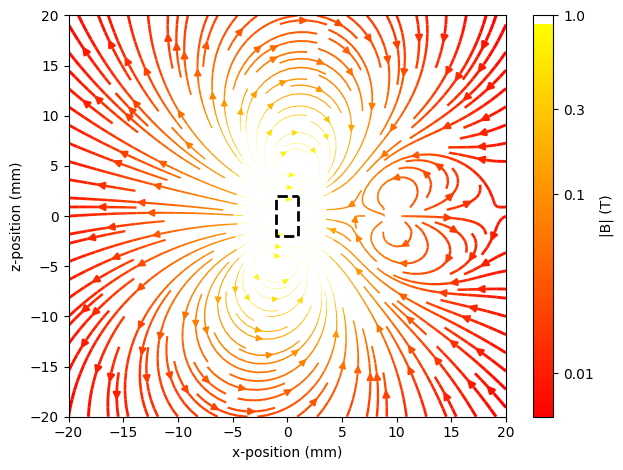

In [171]:
import matplotlib.pyplot as plt
import numpy as np

import magpylib as magpy

# Create a Matplotlib figure
fig, ax = plt.subplots()

# Create an observer grid in the xz-symmetry plane
ts = np.linspace(-20, 20, 40)
grid = np.array([[(x, 0, z) for x in ts] for z in ts])
X, _, Z = np.moveaxis(grid, 2, 0)
print(cube1.position)
cube2.orientation = R.from_rotvec((0,0,270),degrees = True)
print(cube2.orientation.as_rotvec(degrees = True))
# Compute the B-field of a cube magnet on the grid
cube1 = magpy.magnet.Cuboid(polarization=(0,1,0), dimension=(1,1,1),position=(0,10,0))
cube2 = magpy.magnet.Cuboid(polarization=(1,0,-0), dimension=(1,1,1), position=(10,0,0))
cube3 = magpy.magnet.Cuboid(polarization=(0,-1,0), dimension=(1,1,1), position=(-10,0,0))
cube4 = magpy.magnet.Cuboid(polarization=(0,-1,0), dimension=(1,1,1), position=(0,-10,0))

B1  = cube.getB(grid) +  cube2.getB(grid) + cube3.getB(grid) + cube4.getB(grid)

Bx, _, Bz = np.moveaxis(B1, 2, 0)

# Display the B-field with streamplot using log10-scaled
# color function and linewidth
splt = ax.streamplot(X, Z, Bx, Bz,
    density=1.5,
    color=log10_norm_B,
    linewidth=log10_norm_B,
    cmap="autumn",
)

# Add colorbar with logarithmic labels
cb = fig.colorbar(splt.lines, ax=ax, label="|B| (T)")
ticks = np.array([0.01,0.1,0.3,1])
cb.set_ticks(np.log10(ticks))
cb.set_ticklabels(ticks)

# Outline magnet boundary
ax.plot(
     [1, 1, -1, -1, 1],
     [2, -2, -2, 2, 2],
     "k--",
     lw=2,
 )

# # Figure styling
ax.set(
    xlabel="x-position (mm)",
    ylabel="z-position (mm)",
)

plt.tight_layout()
plt.show()

In [136]:

 len(angles)
 

2

In [212]:
import numpy as np
import magpylib as magpy

N = 4
angles = np.linspace(0, 360, N, endpoint=False)
axis = ['x','x','y','y']
halbach = magpy.Collection()

for a in range(len(angles)):
    cube = magpy.magnet.Cuboid(
        dimension=(1,1,10),
        polarization=(1,0,0),
        position=(2.3,0,0)
    )
    cube.rotate_from_angax(angles[a], 'z', anchor=0)
    cube.rotate_from_angax(angles[a], 'z')
    cube.rotate_from_angax(10, axis[a],anchor = (0,0,0))
    halbach.add(cube)
   
sens = magpy.Sensor(position=np.linspace((0,0,-4),(0,0,4)))
halbach.add(sens)
magpy.show(halbach)



In [214]:
magpy.show({'objects': [halbach,sens], 'output':'Bz','col':1})
